MALIGNANT COMMENTS CLASSIFICATION:-
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(159571, 8)

In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [8]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [9]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [10]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [11]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [12]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [13]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [14]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [15]:
df_1=df[(df['malignant']==0) & (df['highly_malignant']==0) & (df['rude']==0) & (df['threat']==0) & (df['abuse']==0) & (df['loathe']==0)]

In [16]:
df_1.shape

(143346, 7)

In [17]:
df_2=df[(df['malignant']==1) | (df['highly_malignant']==1) | (df['rude']==1) | (df['threat']==1) | (df['abuse']==1) | (df['loathe']==1)]

In [18]:
df_2

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [19]:
df_2.shape

(16225, 7)

In [20]:
#so we have 143346 data points that is normal comments and 16225 data points that is malignant comments
#which indicates that the dataset is completely imbalanced

In [22]:
import string
import re
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#ps=PorterStemmer()

In [119]:
#performing the sentiment analysis on the dataset

In [120]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
sia=SentimentIntensityAnalyzer()

In [25]:
df_1_1000=df_1.iloc[:1000,:]

In [26]:
for i in df_1_1000['comment_text']:
    print(i)
    print(sia.polarity_scores(i))

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.5574}
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
{'neg': 0.099, 'neu': 0.743, 'pos': 0.158, 'compound': 0.2942}
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
{'neg': 0.083, 'neu': 0.849, 'pos': 0.068, 'compound': -0.1779}
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying s

{'neg': 0.03, 'neu': 0.834, 'pos': 0.136, 'compound': 0.8982}
Al Messier 
This article was a non-notable biography according to the criteria set out in WP:BIO. (aeropagitica)
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
"

 Link to Sacramento 

I placed a wikipedia-link in this article where the word ""Sacramento"" appears.  Another editor, who appears to be stalking me and is reverting everything that I do, claims that I am ""overlinking"" by doing this.  I have read the policy, and think I understand it, and I disagree with him.  The word ""Sacramento"" was not linked anywhere else in this article before I made the link, and I think that my link provided good context for a reader who did not know Walnut Creek but thought that maybe they knew Sacramento.  Was there anything wrong with my link?  I would like someone objective to give their opinions. 74.234.45.208  "
{'neg': 0.056, 'neu': 0.896, 'pos': 0.049, 'compound': -0.1901}
"
Reliable sources indicate otherwise. Please do

{'neg': 0.024, 'neu': 0.881, 'pos': 0.095, 'compound': 0.9941}
The total population(10 millions) does not match with the e sum of the referenced populationsbelow in the infoboxImages in Infobox
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
to a convicted felon
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lol censorship. You're really disappointed that NPOV is a core policy, aren't you?  (talk ⋅ contribs)
{'neg': 0.187, 'neu': 0.66, 'pos': 0.154, 'compound': -0.1513}
MfD nomination of Wikipedia:Try your best
Wikipedia:Try your best, a page you substantially contributed to, has been nominated for deletion. Your opinions on the matter are welcome; please participate in the discussion by adding your comments at Wikipedia:Miscellany for deletion/Wikipedia:Try your best  and please be sure to sign your comments with four tildes (~~~~).  You are free to edit the content of Wikipedia:Try your best during the discussion but should not remove the miscellany for deletion template

{'neg': 0.107, 'neu': 0.81, 'pos': 0.082, 'compound': -0.8057}
Well, i'm sorry, but attacking me and my edits is exactly what you're doing...wow, there's some seriously snotty people on wikipedia!!! And yes, there is a need to separate the featured single, 100% DEFINITLY!!!!!!!!!
{'neg': 0.202, 'neu': 0.675, 'pos': 0.123, 'compound': -0.5053}
"== TfD nomination of Template:SilentRedirect ==

Template:SilentRedirect has been nominated for deletion. You are invited to comment on the discussion at Wikipedia:Templates for deletion#Template:SilentRedirect. Thank you.   | (talk) 

 Watermarks 

I shall remove the obvious ones, the less obvious ones stay. I am allowed to watermark images with anything whatsoever I wish to, even if it's a contradiction, and if you wish me to use up further WP  bandwidth by re-uploading them, that has no effect on me. I can't do anything until this evening, and if any get deleted, I shall reupload them. Yours without respect (talk|email) 
You could have the gra

{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.8423}
I think it is a little disingenuous of Zet to claim that a division which had lost most of its fighting troops was 'far from destroyed' when its fighting capacity was close to nil.
{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compound': -0.8758}
"
{| width=""100%"" style=""background:transparent""
{| width=""100%"" style=""background-color:#""
|style=""width: 50%; border:1px solid #; background-color:#; vertical-align:top""|
 Hello Madstar890, and Welcome to Wikipedia!
Please remember to sign your name on talk pages by clicking  or using four tildes (~~~~); this will automatically produce your username and the date. Also, please do your best to always fill in the edit summary field. Below are some useful links to facilitate your involvement.
Happy editing! —αἰτίας •discussion• 
{| width=""100%"" style=""background-color:#""
|style=""width: 50%; border:0; background-color:#; vertical-align:top""|
 Getting started Introduction
 The 

{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9638}
I like to see it in print, since it's been listed for days now without an URL.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}
"the proposed deletion process  because of the following concern:
Wikipedia should not be used as a place for guides or a walk through.

All contributions are appreciated, but this article may not satisfy Wikipedia's criteria for inclusion, and the deletion notice should explain why (see also ""What Wikipedia is not"" and Wikipedia's deletion policy).  You may prevent the proposed deletion by removing the  notice, but please explain why you disagree with the proposed deletion in your edit summary or on its talk page.

Please consider improving the article to address the issues raised because, even though removing the deletion notice will prevent deletion through the proposed deletion process, the article may still be deleted if it matches any of the speedy deletion criteria or it can be s

In [27]:
# By observing the above polarity scores, we can notice that majority are of neutral scores, hence, it is not labelled negative

In [28]:
#now we will clean the dataset

In [29]:
import sys
sys.setrecursionlimit(1500)

In [30]:
cleaned_dataset=[]
for i in df['comment_text']:
    cleaned_text=i.split()
    cleaned_text=[i.lower() for i in cleaned_text]
    cleaned_text=[re.sub(r'[\n]','',i)for i in cleaned_text]
    cleaned_text=[re.sub(r'[^a-zA-Z]','',i)for i in cleaned_text]
    cleaned_text=[j for j in cleaned_text if j not in stopwords.words('english')]
    #cleaned_text=[ps.stem(k) for k in cleaned_text]
    cleaned_text=(' ').join(cleaned_text)
    cleaned_dataset.append(cleaned_text)

In [31]:
cleaned_dataset

['explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired',
 'daww matches background colour im seemingly stuck thanks talk  january   utc',
 'hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 ' cant make real suggestions improvement  wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first  preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport ',
 'sir hero chance remember page thats',
 ' congratulations well use tools well  talk ',
 'cocksucker piss around work',
 'vandalism matt shirvington article reverted please dont banned',
 'sorry word nonsen

In [32]:
df['cleaned_text']=cleaned_dataset

In [33]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour im seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wonde...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [36]:
import matplotlib.pyplot as plt

In [38]:
# Now lets the wordcloud for each label separately
df_abuse=df[(df['abuse']==1)]

df_malignant=df[(df['malignant']==1)]

df_highlymalignant=df[(df['highly_malignant']==1)]

df_rude=df[(df['rude']==1)]

df_threat=df[(df['threat']==1)]

df_loathe=df[(df['loathe']==1)]

In [39]:
# Lets check what appears most in the normal data
from wordcloud import WordCloud
wordcloud=WordCloud(width=400,height=400,max_words=300).generate(str(df['cleaned_text']))

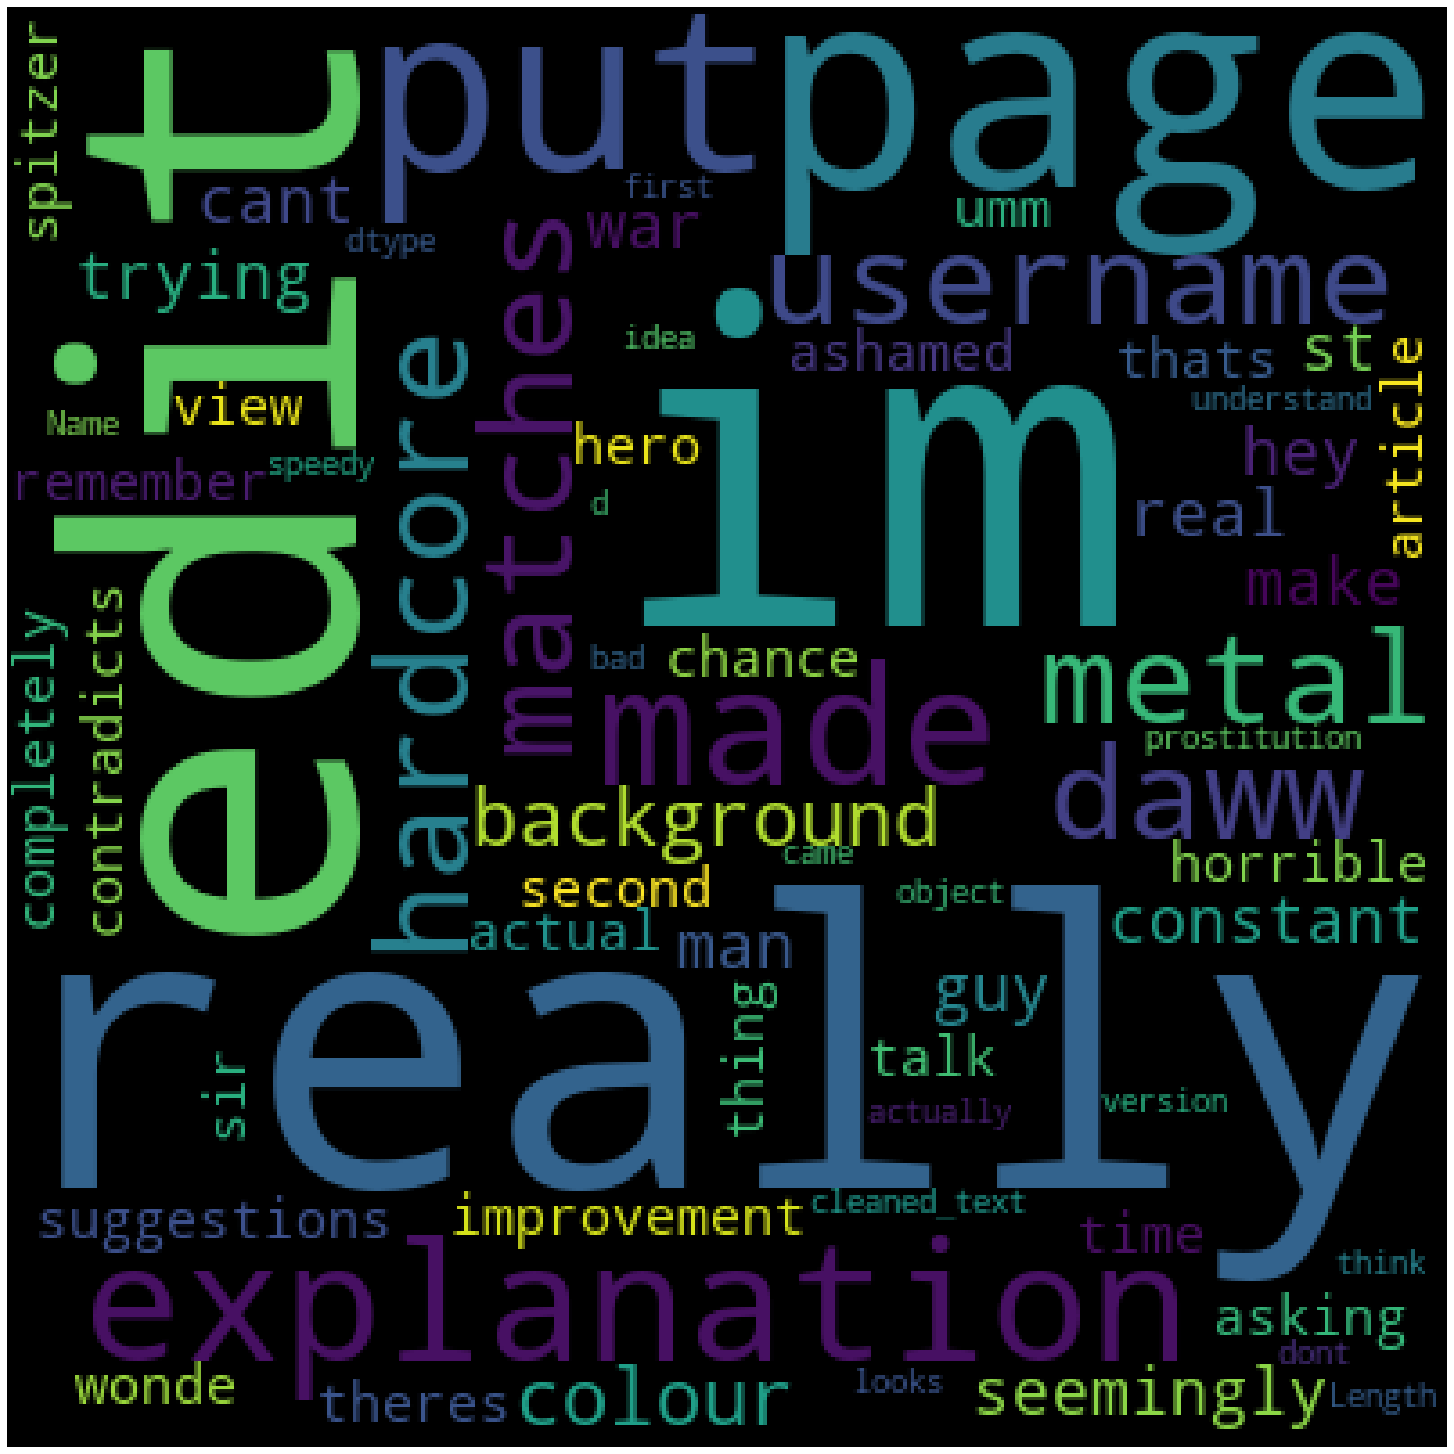

In [40]:
# plot the wordcloud image
plt.figure(figsize=(20,20),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# wordcloud for all types of comments

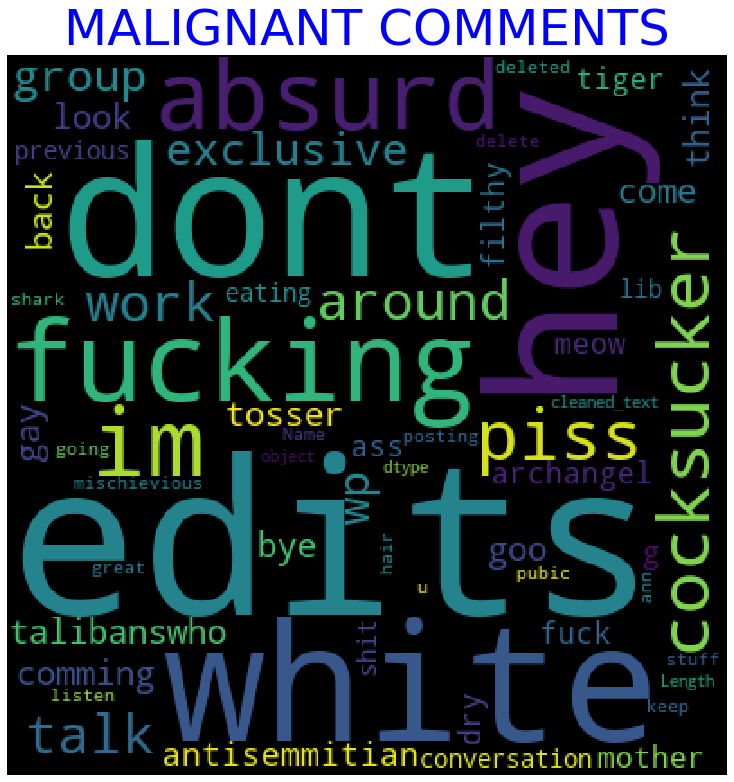

In [41]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='MALIGNANT COMMENTS',fontdict={'fontsize':50, 'fontweight':50, 'color':'BLUE'})
plt.show()

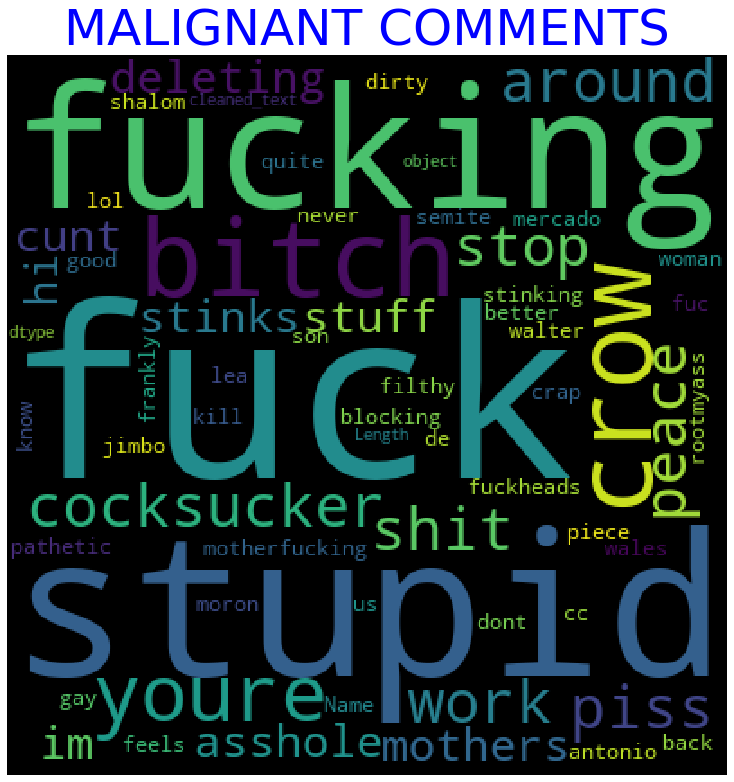

In [44]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='MALIGNANT COMMENTS',fontdict={'fontsize':50, 'fontweight':50, 'color':'blue'})
plt.show()

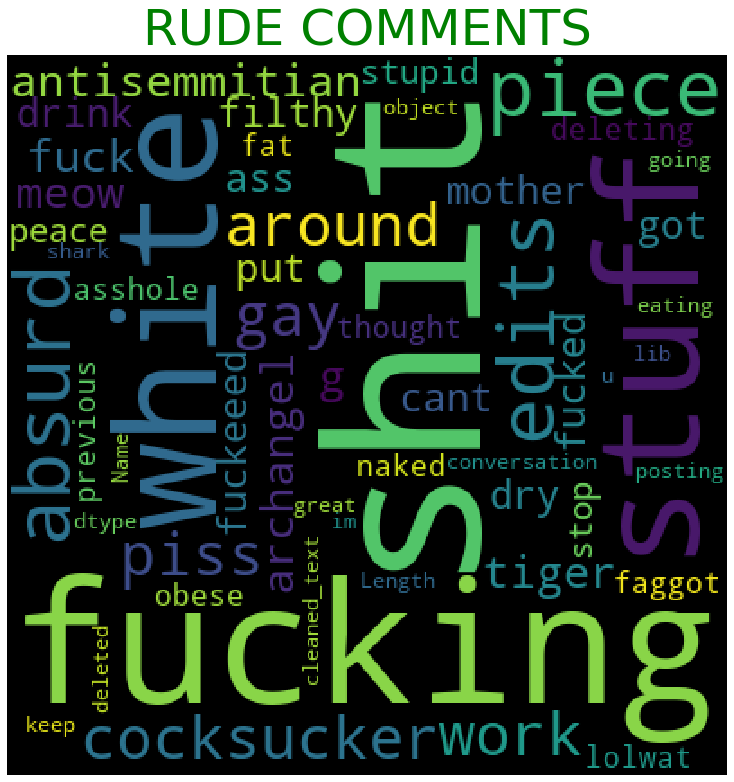

In [45]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='RUDE COMMENTS',fontdict={'fontsize':50, 'fontweight':50, 'color':'green'})
plt.show()

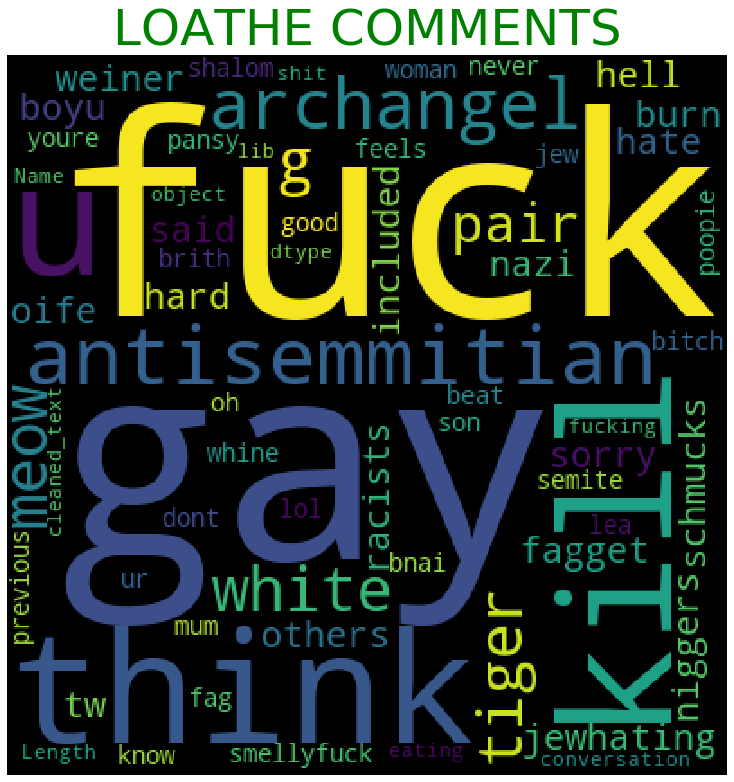

In [46]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='LOATHE COMMENTS',fontdict={'fontsize':50, 'fontweight':50, 'color':'green'})
plt.show()

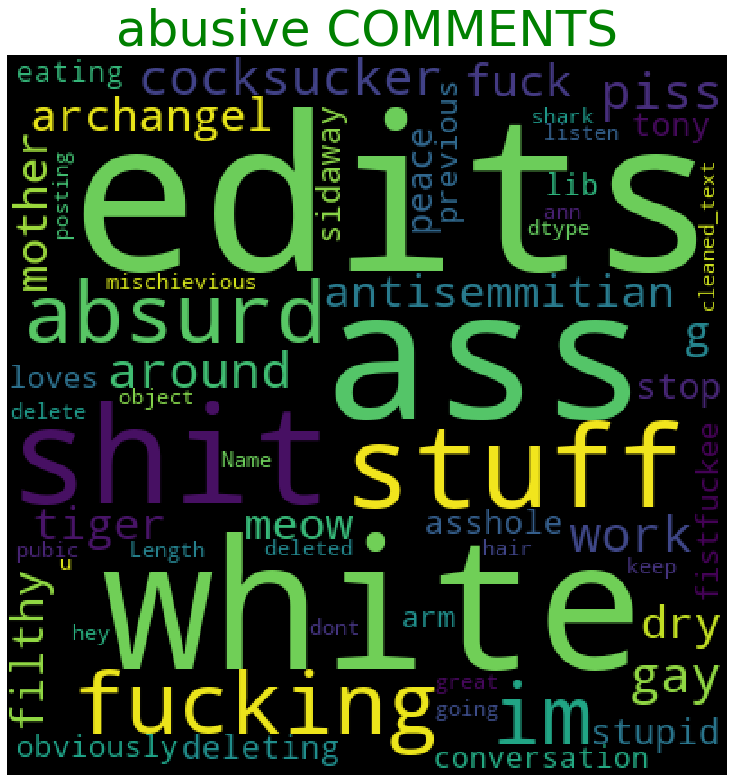

In [47]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='abusive COMMENTS',fontdict={'fontsize':50, 'fontweight':50, 'color':'green'})
plt.show()

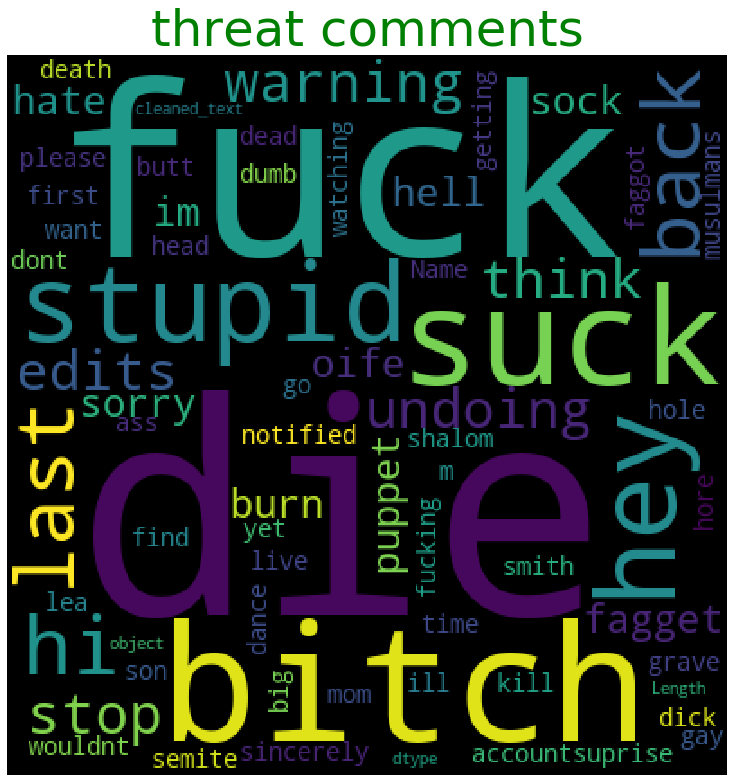

In [49]:
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['cleaned_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='threat comments',fontdict={'fontsize':50, 'fontweight':50, 'color':'green'})
plt.show()

In [118]:
#converting text into vectors

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

In [52]:
x=vect.fit_transform(df['cleaned_text'])

In [55]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour im seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wonde...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [57]:
df_new=df.copy()

In [63]:
y=df.iloc[:,1:7]

In [64]:
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [65]:
y.shape

(159571, 6)

In [117]:
#balancing the dataset

In [69]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [70]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()

In [71]:
y=np.column_stack((df['malignant'],df['highly_malignant'],df['rude'],df['threat'],df['abuse'],df['loathe']))
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [72]:
x1,y1=oversample.fit_resample(x,y)

In [73]:
y.shape

(159571, 6)

In [74]:
y1.shape

(793200, 5)

In [75]:
x.shape

(159571, 223797)

In [76]:
x1.shape

(793200, 223797)

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [95]:
from sklearn.metrics import hamming_loss, accuracy_score

In [92]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
pred=OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train,y_train).predict(x_test)

In [93]:
classifier=OneVsRestClassifier(LinearSVC(random_state=0))
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [96]:
print("Accuracy Score", accuracy_score(pred,test_y))
print("Hamming Loss", hamming_loss(pred,test_y))

Accuracy Score 0.9180009399968667
Hamming Loss 0.018805159538357093


In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77      2360
           1       0.23      0.48      0.31       157
           2       0.69      0.89      0.77      1319
           3       0.15      0.78      0.26        18
           4       0.54      0.77      0.63      1104
           5       0.24      0.65      0.35       110

   micro avg       0.60      0.85      0.70      5068
   macro avg       0.42      0.74      0.52      5068
weighted avg       0.62      0.85      0.72      5068
 samples avg       0.06      0.06      0.06      5068



In [102]:
#testing the test dataset

In [98]:
dftest=pd.read_csv('test.csv')

In [101]:
cleaned_dataset=[]
for i in dftest['comment_text']:
    cleaned_text=i.split()
    cleaned_text=[i.lower() for i in cleaned_text]
    cleaned_text=[re.sub(r'[\n]','',i)for i in cleaned_text]
    cleaned_text=[re.sub(r'[^a-zA-Z]','',i)for i in cleaned_text]
    cleaned_text=[j for j in cleaned_text if j not in stopwords.words('english')]
    #cleaned_text=[ps.stem(k) for k in cleaned_text]
    cleaned_text=(' ').join(cleaned_text)
    cleaned_dataset.append(cleaned_text)

In [104]:
dftest['cleaned_comment']=cleaned_dataset

In [105]:
x_test=vect.transform(dftest['cleaned_comment'])

In [106]:
predictions=classifier.predict(x_test)
predictiondf=pd.DataFrame(predictions)

In [107]:
predictiondf.to_csv("Malignant_Comments_predictions.csv")

In [110]:
# Saving the model 

import joblib
joblib.dump(classifier,'malignant_comments.obj')

['malignant_comments.obj']